## Pandemic Simulation
This Jupyter Notebook contains the Python programming supporting my unpublished paper:
Modeling the COVID-19 Pandemic
by Donald R. Falkenburg (Draft 14 MAY 2020)
http://www.falkenburg-genealogy.com/papers/COVID-19-math.pdf


The Equations for the Epidemic

$\frac{dS}{dt}=-\frac{\rho I S}{N} \\ 
\frac{dI}{dt}=\frac{\rho I S}{N}-\mu I -\alpha I \\ 
\frac{dR}{dt}=  {\alpha I } \\ 
\frac{dM}{dt} = \mu I \\
N=S+I+R$
<table align="left">
<thead>
	<tr>
		<th style="text-align:center">Variable</th>
		<th style="text-align:center">Definition</th>	
	</tr>
</thead>
<tbody>
	<tr >
		<td style="text-align:center">N</td>
		<td style="text-align:center">Population Size</td>
	</tr>
	<tr>
		<td style="text-align:center">S</td>
		<td style="text-align:center">Susceptable Population</td>
	</tr>
    <tr>
		<td style="text-align:center">I</td>
		<td style="text-align:center">Infected Population</td>
	</tr>
    <tr>
		<td style="text-align:center">R</td>
		<td style="text-align:center">Recovered Population</td>
	</tr>    
    <tr>
		<td style="text-align:center">M</td>
		<td style="text-align:center">Total Deceased</td>
	</tr>
    </tbody>
</table>

There are three parameters which drive the model $\rho, \mu$, and $\alpha$.  There is considerable uncertainty in these parameters (more later).  One of the critical values is $\rho$ which governs the person to person transmission rate.  Clearly, $\rho$ depends on population density.  We see that in New York with high population density and transmission at a crisis level.  Did you ever travel in the subways of New York during rush hour?  Initial estimates pegged the number of persons an infected individual would pass the virus to at between 2 and 3.  Again, density matters.  I chose to use 2.5.  We woll cosider the second equation above.  Near the start of the infection S/N ≈ 1. If we consider a single individual I=1 over a three week period of contagion (value not known at this time) we can approximate the infection growth as:

$\frac{\Delta I}{\Delta t}=\frac{\rho I S}{N}$ Thus, $\rho=\frac{2.3}{3}=.77$
Using similar reasoning I estimated the  other parameters.  Initial estimates were that for 1000 confirmed cases, there would be 38 deaths.  Initial estimates were that only 20% of infections were confirmed (this turns out in later studies to be grossly under estimated). So that for 1000 confirmed cases there are 5000 cases,, 38 deaths, with an assumption that this occurs over a three week period we get:
$\mu=\frac{38}{5000*3}≈.001$
The cure rate $\alpha$ ca be estimated from the remaining term $\alpha= \frac{5000-38}{5000*3}=.33$

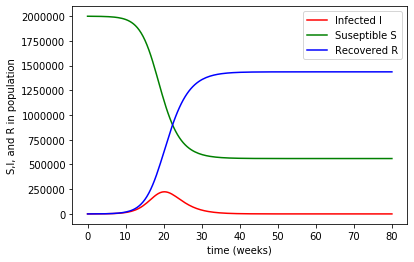

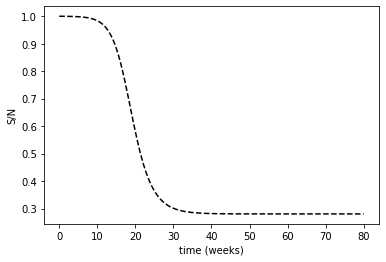

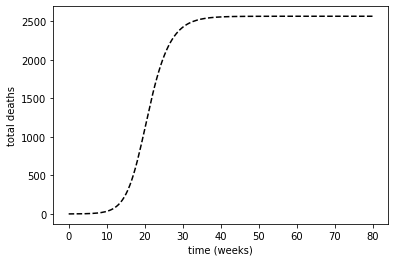

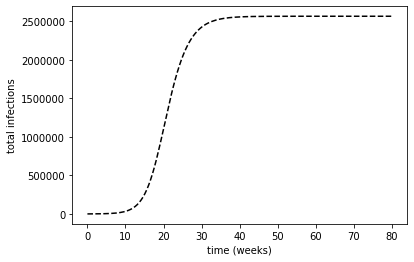

The apex occurs at 20.13 The peak infections are: 223857.70


In [1]:
#!/usrbin/python

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# parameters 
mu= .001
a=.56
ir=.991
N0=2000000
I0=200
S0=N0-I0
R0=0
M0=0
Y0=0
Imax=0
Tmax=0
# function that returns ds[/dt
def model(z,t):
    S=z[0]
    I=z[1]
    R=z[2]
    N=z[3]
    M=z[4]
    Y=z[5]

    dSdt=-S*I*ir/N
    dIdt=S*I*ir/N-(mu+a)*I
    dRdt=+a*I
    dNdt=-mu*I
    dMdt=mu*I
    dYdt=I

    return [dSdt,dIdt,dRdt,dNdt,dMdt,dYdt] 

# initial condition
z0=[S0,I0,R0,N0,M0,Y0]


# time points
t = np.linspace(0,80,160)

# solve ODEs

z = odeint(model,z0,t)
S=z[:,0]
I=z[:,1]
R=z[:,2]
N=z[:,3]
M=z[:,4]
Y=z[:,5]
s=S/N


    
plt.plot(t,I,'r-',label='Infected I')
plt.plot(t,S,'g-',label='Suseptible S')
plt.plot(t,R,'b-',label='Recovered R')

plt.xlabel('time (weeks)')
plt.ylabel('S,I, and R in population')
plt.legend()

plt.show()


plt.plot(t,s,'k--',label='S/N')
plt.xlabel('time (weeks)')
plt.ylabel('S/N')
plt.show()

plt.plot(t,M,'k--',label='total deaths')
plt.xlabel('time (weeks)')
plt.ylabel('total deaths')
plt.show()

plt.plot(t,Y,'k--',label='total cases')
plt.xlabel('time (weeks)')
plt.ylabel('total infections')
plt.show()

for k in range(len(z[:,1])):
    if z[k,1]>Imax:
        Imax=z[k,1]
        Tmax=t[k]
print('The apex occurs at',f"{Tmax:.2f}",'The peak infections are:', f"{Imax:.2f}")


### Parametric study of the effect of  $\rho$   
The black line is the baseline simulation from above.
Next lets see what happens if we are following the red curve  𝜌=.77   to a value of .435.



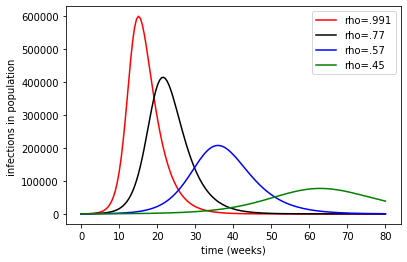

In [2]:
#!/usrbin/python

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# parameters 
mu= .001
a=.33

# parset is a list of the parameters of ri; gra1 & gra2 contain arguements for pyplot to distinguish runs  

parset=[.991,.77,.57,.45]
gra1=['r-','k-','b','g-']
gra2=['rho=.991','rho=.77','rho=.57','rho=.45']
N0=2000000


#initial conditions
I0=200
S0=N0-I0
R0=0
M0=0

# function that returns ds[/dt

def model(z,t):
    S=z[0]
    I=z[1]
    R=z[2]
    N=z[3]
    M=z[4]
    dSdt=-S*I*ir/N
    dIdt=S*I*ir/N-(mu+a)*I
    dRdt=+a*I
    dNdt=-mu*I
    dMdt=mu*I
    return [dSdt,dIdt,dRdt,dNdt,dMdt] 

# setting the initial value of the numpy array z and generating the time set

z0=[S0,I0,R0,N0,M0]
t = np.linspace(0,80,160)

# solve ODEs for each value of ri in the list parset

for k in range(len(parset)):
    ir=parset[k]
    z = odeint(model,z0,t)
    S=z[:,0]
    I=z[:,1]
    R=z[:,2]
    N=z[:,3]
    M=z[:,4] 
    plt.plot(t,I,gra1[k],label=gra2[k])
    
    # plotting the ensemble graph
    
plt.xlabel('time (weeks)')
plt.ylabel('infections in population ')
plt.legend()
plt.show()

### Explore the effect of varying the time social distancing is applied

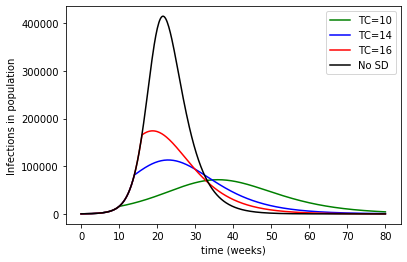

In [30]:
#!/usrbin/python

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# parameters 
mu= .001
a=.33
ir0=.77
parset=[10,14,16,200]
gra1=['g-','b-','r-','k']
gra2=['TC=10','TC=14','TC=16','No SD']
N0=2000000
I0=200
S0=N0-I0
R0=0
M0=0
TC=100
# function that returns ds[/dt
def model(z,t):
    S=z[0]
    I=z[1]
    R=z[2]
    N=z[3]
    M=z[4]
    ir=ir0
    if(t>TC):
        ir=.435
    dSdt=-S*I*ir/N
    dIdt=S*I*ir/N-(mu+a)*I
    dRdt=+a*I
    dNdt=-mu*I
    dMdt=mu*I
    return [dSdt,dIdt,dRdt,dNdt,dMdt] 

# initial condition
z0=[S0,I0,R0,N0,M0]


# time points
t = np.linspace(0,80,400)
# solve ODEs
for k in range(len(parset)):
    TC=parset[k]
    z = odeint(model,z0,t)
    S=z[:,0]
    I=z[:,1]
    R=z[:,2]
    N=z[:,3]
    M=z[:,4] 
    plt.plot(t,I,gra1[k],label=gra2[k])

plt.xlabel('time (weeks)')
plt.ylabel('Infections in population')
plt.legend()

plt.show()




These four runs illustrate the importance of early implementation of social distancing in terms of the timing of the epidemic. If we allow the epidemic to 'run is course' that is represented by the black curve.  The early interventions (green) shifts the curve to the right and flattens it.  Later implementation (blue and red) will be increasingly less effective.  If we wait until the apex to implement social distancing, it will accelerate decline slightly, but the response will closly follow the black curve, in which we did nothing.  

It must be noted that the implementation of social distancing is aimed at reducing the apex and alleviating pressure on the medical infrastructure. If hospitals become overwhelmed, the death rate will spike.  Failing that, the mortality is proportional to the area under the several curves just generated.

### Removing Social Distancing

Let us suppose that we take the red curve above as the baseline and ask what happens if we remove social distancing at 20, 25, and 30 weeks

The four curves generated are for (1) continued SD (black) and SD removed at 20 weeks (Green), 25 weeks (blue) and 30 weeks (red).  Notice that removing social distancing near the peak can be disasterous, creating a situation in which the original hard work to implement social distancing is lost.  The reason the green curve drops more rapidly than the blue and red curves is that with the re-spike in infections, The ratio S/N in the rate equations is smaller.  In orther words, there are fewer people who are suseptable to the infection.

[16, 20]
16 20
[16, 25]
16 25
[16, 30]
16 30
[100, 120]
100 120


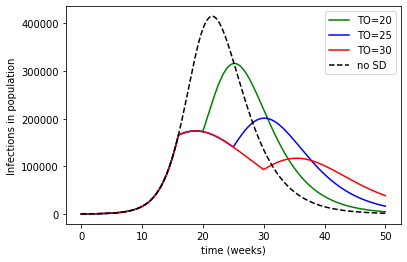

In [17]:
#!/usrbin/python

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# parameters 
mu= .001
a=.33
ir0=.77
parset=[[16,20],[16,25],[16,30],[100,120]]
gra1=['g-','b-','r-','k--']
gra2=['TO=20','TO=25','TO=30','no SD']
N0=2000000
I0=200
S0=N0-I0
R0=0
M0=0
TC=16
# function that returns ds[/dt
def model(z,t):
    S=z[0]
    I=z[1]
    R=z[2]
    N=z[3]
    M=z[4]
    ir=ir0
    if(t>TC and t<TO):
        ir=.435
    dSdt=-S*I*ir/N
    dIdt=S*I*ir/N-(mu+a)*I
    dRdt=+a*I
    dNdt=-mu*I
    dMdt=mu*I
    return [dSdt,dIdt,dRdt,dNdt,dMdt] 

# initial condition
z0=[S0,I0,R0,N0,M0]


# time points
t = np.linspace(0,50,400)
# solve ODEs
for k in range(len(parset)):
    times=parset[k]
    print(times)
    TC=times[0]
    TO=times[1]
    print(TC, TO)
    z = odeint(model,z0,t)
    S=z[:,0]
    I=z[:,1]
    R=z[:,2]
    N=z[:,3]
    M=z[:,4] 
    plt.plot(t,I,gra1[k],label=gra2[k])

plt.xlabel('time (weeks)')
plt.ylabel('Infections in population')
plt.legend()

plt.show()

### Accessing Covid data
Data for many counties across the United States if found at:
https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv
This is a rather large data file.  The following code selects those entries for Santa Clara County, CA and organizes that data for use in this project.  The data contains the total infections to date.  This program computes the daily change in infections.  this is really I(t) in the equations.

In later parts of this project we will select a subset of this data when we work with time intervals 40 < t < 60 days and t < 60 days.

In [1]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
path1='https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
path2= '/Users/don_falken/Documents/Notebooks/Data/Santa-Clara.csv'
df = pd.read_csv (path1) # load data set
df1=df.loc[df['county'] == "Santa Clara"]
df2=df1[['date','cases','deaths']]
seq1=np.arange(0,len(df2),1)
seq1=pd.Series(np.arange(0,len(df2),1))
seq2=seq1/7
df2.index=seq1
df2.insert(1,"day",seq1,True)
df2.insert(2,"wk",seq2,True)
df3=df2
df3=df2[['date','day','wk','cases','deaths']]
arr = df3.to_numpy()

x=arr[:,3]

y=[0]
diff=0
for i in range(len(x)):
    if i>0:
        diff=x[i]-x[i-1]
        y.append(diff)
df3.insert(4,"di",y,True)       

df3.to_csv(path2)



## Santa Clara Data

### Importing Santa Clara Data (more data)
It appears as though the number of cases is rising after 115 days.  This could be due to expanded testing or by a secondary outbreak.  I suspect the former

           date    day         wk       county  cases    di  deaths
0    2020-01-31    0.0   0.000000  Santa Clara      1   NaN       0
1    2020-02-01    1.0   0.142857  Santa Clara      1   0.0       0
2    2020-02-02    2.0   0.285714  Santa Clara      2   1.0       0
3    2020-02-03    3.0   0.428571  Santa Clara      2   0.0       0
4    2020-02-04    4.0   0.571429  Santa Clara      2   0.0       0
..          ...    ...        ...          ...    ...   ...     ...
115  2020-05-25  115.0  16.428571  Santa Clara   2652  35.0     140
116  2020-05-26  116.0  16.571429  Santa Clara   2675  23.0     141
117  2020-05-27  117.0  16.714286  Santa Clara   2688  13.0     141
118  2020-05-28  118.0  16.857143  Santa Clara   2701  13.0     142
119  2020-05-29  119.0  17.000000  Santa Clara   2707   6.0     142

[120 rows x 7 columns]


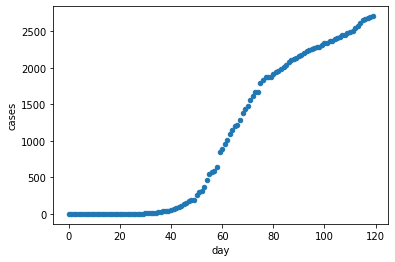

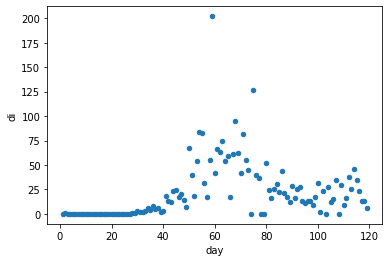

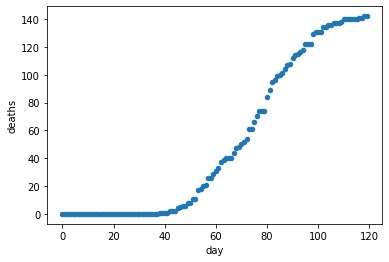

In [16]:
import numpy as np
import pandas as pd  # To read data
import matplotlib.pyplot as plt  # To visualize
df=pd.read_csv(r'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
df.drop(['fips','state'],axis=1, inplace=True)
df=df.loc[df['county']=='Santa Clara']
df.insert(1,'day',np.linspace(0,len(df)-1,len(df)))
df.insert(2,'wk',np.linspace(0,len(df)-1,len(df))/7.)
df.insert(5,'di',0)
df["di"]=df['cases'].diff(1)
df.reset_index(inplace=True)
df.drop(['index'],axis=1, inplace=True)
print(df)
df.plot(x ='day', y='cases', kind = 'scatter')
df.plot(x='day', y='di',kind = 'scatter')
df.plot(x='day', y='deaths',kind = 'scatter')


In [ ]:
### Data thru 

           date    day         wk       county  cases    di  deaths
0    2020-01-31    0.0   0.000000  Santa Clara      1   NaN       0
1    2020-02-01    1.0   0.142857  Santa Clara      1   0.0       0
2    2020-02-02    2.0   0.285714  Santa Clara      2   1.0       0
3    2020-02-03    3.0   0.428571  Santa Clara      2   0.0       0
4    2020-02-04    4.0   0.571429  Santa Clara      2   0.0       0
..          ...    ...        ...          ...    ...   ...     ...
128  2020-06-07  128.0  18.285714  Santa Clara   2942  22.0     145
129  2020-06-08  129.0  18.428571  Santa Clara   2973  31.0     146
130  2020-06-09  130.0  18.571429  Santa Clara   3017  44.0     150
131  2020-06-10  131.0  18.714286  Santa Clara   3032  15.0     150
132  2020-06-11  132.0  18.857143  Santa Clara   3063  31.0     150

[133 rows x 7 columns]


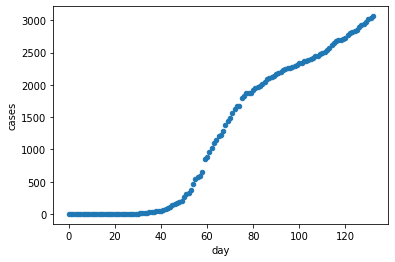

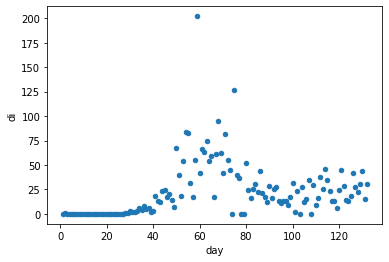

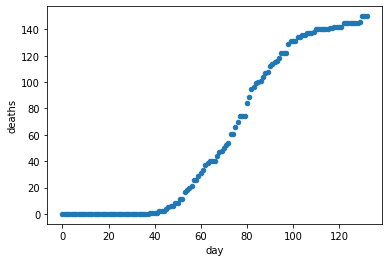

In [1]:
import numpy as np
import pandas as pd  # To read data
import matplotlib.pyplot as plt  # To visualize
df=pd.read_csv(r'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
df.drop(['fips','state'],axis=1, inplace=True)
df=df.loc[df['county']=='Santa Clara']
df.insert(1,'day',np.linspace(0,len(df)-1,len(df)))
df.insert(2,'wk',np.linspace(0,len(df)-1,len(df))/7.)
df.insert(5,'di',0)
df["di"]=df['cases'].diff(1)
df.reset_index(inplace=True)
df.drop(['index'],axis=1, inplace=True)
print(df)
df.plot(x ='day', y='cases', kind = 'scatter')
df.plot(x='day', y='di',kind = 'scatter')
df.plot(x='day', y='deaths',kind = 'scatter')



### Data Analysis Santa Clara County
Using the Santa Clara County COVID19 dashboard https://www.sccgov.org/sites/covid19/Pages/dashboard.aspx
From my csv file
6-8 create a new data frame containing infections and change in infections for the first 15 weeks in the data set.
9-10 create numpy arrays for time (t) and infections (y)
12-13 define the model to fit to the data
using curve_fit from scipy 
14-15 do the fit and print the parameters and covariances
16-19 plot the results



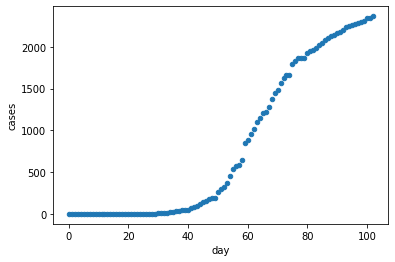

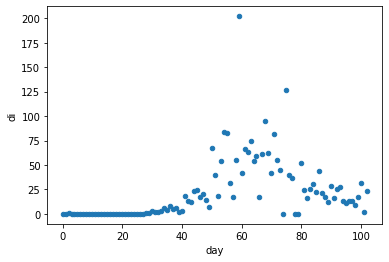

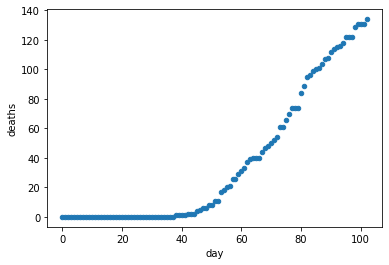

In [1]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
df = pd.read_csv (r'/Users/don_falken/Documents/Notebooks/Data/Santa-Clara.csv') # load data set
df1=df[['day','cases','di','deaths']] #df1 is formed from df referencing the two columns
df1=df1.dropna()
df1.plot(x ='day', y='cases', kind = 'scatter')
df1.plot(x='day', y='di',kind = 'scatter')
df1.plot(x='day', y='deaths',kind = 'scatter')

### Data Fit to cumulative cases
During weeks 40 to week 60 we expect a set of dynamics of the pandemic which depend on the contagion rate during this period.  We fit the raw data from above assuming that S/N is near 1.0.  The non-linear differential equation for I(t) 
$$\frac{dI}{dt}=\frac{\rho I S}{N}-\mu I -\alpha I$$
reduces to an ODE.  The solution is

$$\frac{dI}{dt} e^{b(t-40) $$

The solution is $I(40)e^{b(t-40)}$


[40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60] [ 48  66  79  91 114 138 155 175 189 196 263 303 321 375 459 542 574 591
 646 848 890]
[11.74108953  0.10915463]
[[ 7.53057937e-01 -5.54688404e-03]
 [-5.54688404e-03  4.25934460e-05]]


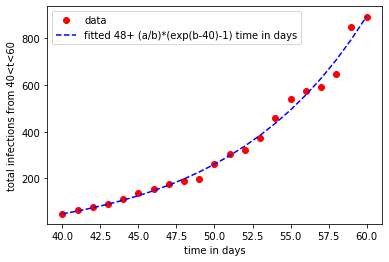

Y(60)= 894.9260076479738
b= 0.10915462981266467
a= 11.741089532474133


In [2]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from scipy.optimize import curve_fit  # import to fit curve
df = pd.read_csv (r'/Users/don_falken/Notebooks/Data/Santa-Clara.csv') # load data set
df1=df[['day','cases']] #df1 is formed from df referencing the three columns
df2=df1.loc[df['day'] >= 40] 
df3=df2.loc[df['day'] <= 60]
t = df3.to_numpy()[:,0]
y = df3.to_numpy()[:,1]
print(t,y)
plt.plot(t, y, 'o', color ='red', label ="data") 
def model(t,a,b): 
    return 48+(a/b)*(np.exp(b*(t-40))-1)   
param, param_cov = curve_fit(model,t,y)
print(param) 
print(param_cov)
ypre=model(t,param[0],param[1])
plt.plot(t, ypre, '--', color ='blue', label ="fitted 48+ (a/b)*(exp(b-40)-1) time in days") 
plt.xlabel('time in days')
plt.ylabel('total infections from 40<t<60')
plt.legend() 
plt.show() 
print('Y(60)=',model(60,param[0],param[1]))
print('b=',param[1])
print('a=',param[0])


We fit a second exponential function to the data after social distancing is applied

[ 7.58272839e+01 -4.34597104e-02]


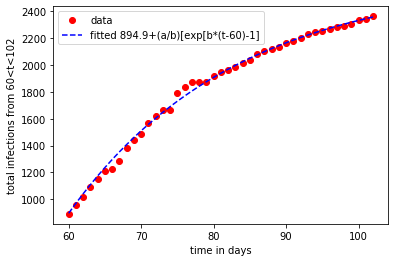

Y(60)= 894.9
Y(90)= 2165.965503612215
b= -0.043459710406265534
a= 75.82728389253418


In [3]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from scipy.optimize import curve_fit  # import to fit curve
df = pd.read_csv (r'/Users/don_falken/Notebooks/Data/Santa-Clara.csv') # load data set
df1=df[['day','cases']] #df1 is formed from df referencing the three columns
df2=df1.loc[df['day'] >= 60] 

t = df2.to_numpy()[:,0]
y = df2.to_numpy()[:,1]
plt.plot(t, y, 'o', color ='red', label ="data") 
def model(t,a,b): 
    return 894.9 + (a/b)*(np.exp(b*(t-60))-1)   
param, param_cov = curve_fit(model,t,y)
print(param) #, param_cov
ypre=model(t,param[0],param[1])
plt.xlabel('time in days')
plt.ylabel('total infections from 60<t<102')
plt.plot(t, ypre, '--', color ='blue', label ="fitted 894.9+(a/b)[exp[b*(t-60)-1]") 
plt.legend() 
plt.show() 
print('Y(60)=',model(60,param[0],param[1]))
print('Y(90)=',model(90,param[0],param[1]))
print('b=',param[1])
print('a=',param[0])

### Data Fit to cumulative deaths
Used data from week 40 to week 60
$$M(t)=M(t_0) +\mu \int_{t_0}^t I(\tau d\tau = M(t_0)+Y_t_0,t0$$

m= 0.038325985512662974
covariance matrix= [[8.82159099e-07]]


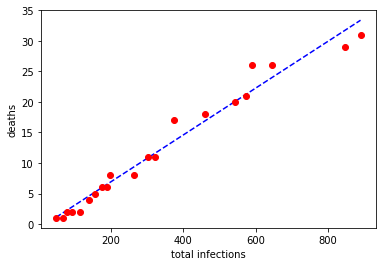

M(848)= 31.775766366668368


In [3]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from scipy.optimize import curve_fit  # import to fit curve
df = pd.read_csv (r'/Users/don_falken/Notebooks/Data/Santa-Clara.csv') # load data set
df1=df[['day','cases','deaths']] #df1 is formed from df referencing the three columns
df2=df1.loc[df1['day'] >= 40] 
df3=df2.loc[df1['day'] <= 60]

x = df3.to_numpy()[:,1]
y = df3.to_numpy()[:,2]
def model(x,m): 
    return m*(x-45)+1   
param, param_cov = curve_fit(model,x,y)
print('m=',param[0])
print('covariance matrix=',param_cov)

ypre=model(x,param[0])
plt.plot(x, ypre, '--', color ='blue', label ="fitted linear model") 
plt.plot(x, y, 'o', color ='red', label ="data") 
plt.xlabel('total infections')
plt.ylabel('deaths')
plt.show() 
print('M(848)=',model(848,param[0]))

### Fit Cumultaive deaths 60 < t < 90

m= 0.05920093068651064
covariance matrix= [[2.85583347e-06]]


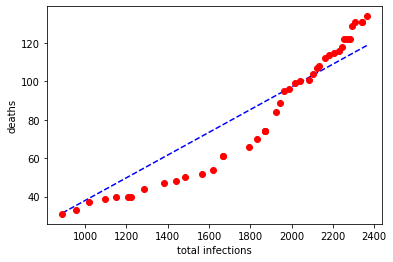

In [4]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from scipy.optimize import curve_fit  # import to fit curve
df = pd.read_csv (r'/Users/don_falken/Notebooks/Data/Santa-Clara.csv') # load data set
df1=df[['day','cases','deaths']] #df1 is formed from df referencing the three columns
df2=df1.loc[df1['day'] >= 60] 
x = df2.to_numpy()[:,1]
y = df2.to_numpy()[:,2]
def model(x,m): 
    return m*(x-894.9)+31.776   
param, param_cov = curve_fit(model,x,y)
print('m=',param[0])
#print('b=',param[1])
print('covariance matrix=',param_cov)

ypre=model(x,param[0])
plt.plot(x, ypre, '--', color ='blue', label ="fitted linear model") 
plt.plot(x, y, 'o', color ='red', label ="data") 
plt.xlabel('total infections')
plt.ylabel('deaths')
plt.show()

### Santa Clara County Simulation
Using a little trial and error
The time period of the simulation is 9 weeks.  This corresponds to 63 days.  The original data fit was for 60 days.  The parameter fk is the scaling parameter relating the confirmed cases to the actual cases Yc=fk*Y.
I used the original a=.33 and from the exponential fit, $\rho-\alpha-\mu =.889$  The value for a was not computed from a data fit.  Did some experiments changing a and fk.

This simulation plots actual data over the range of days from 40 to 60.  This is before social distancing was applied.

### Comments
Santa Clara has identified the first confirmed case of COVID-19  on 31 JAN 2020.  This is considered time=0 weeks for the simulation.  Stanford University study has suggested that the ratio of confirmed cases to actual cases may be off by a factor of perhaps as high as 1/50.  At t=0, I0 is the number of cases.  Instead of using I0=1, I tried I0= 10,20,30,40, and then fine tuned the fit.  In this simulation I0=18 and fk=.02.  Changing fk would also change the results.  In this simulation, I did not alter fk.

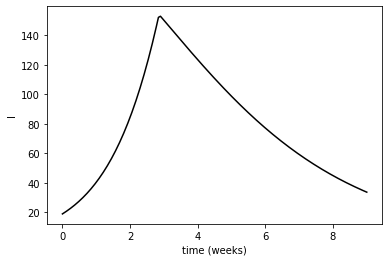

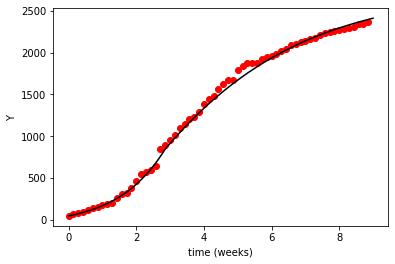

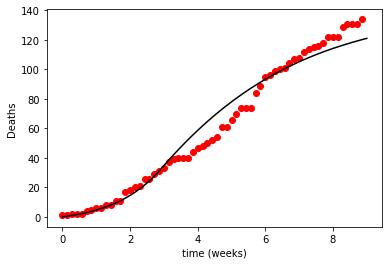

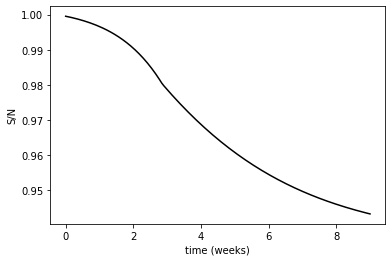

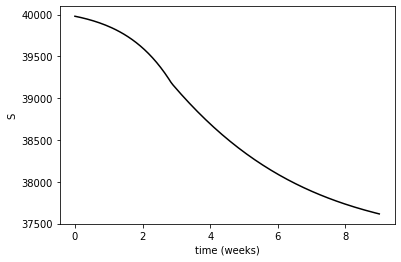

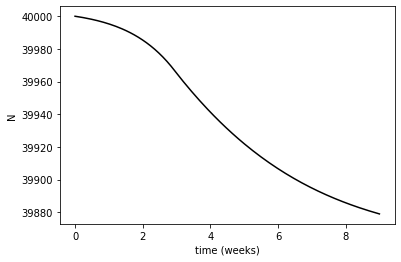

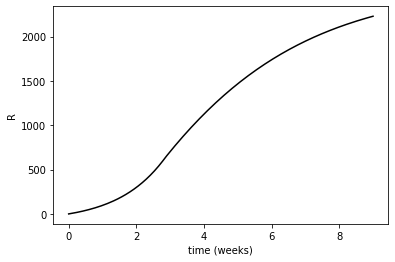

In [10]:
#!/usrbin/python

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd  # To read data
# parameters 
mu0=.1651
a0=3.382
ir0=4.31
k=.02
N0=2000000*k
I0=19
S0=N0-I0
R0=0
M0=0
Y0=45
TC=20.0/7
# function that returns ds[/dt
def model(z,t):    
    S=z[0]
    I=z[1]
    R=z[2]
    M=z[3]
    Y=z[4]
    N=S+I+R
    ir=ir0
    mu=mu0
    a=a0
    if t>TC:
        ir=3.15
        mu=.1744
        a=3.088
    dSdt=-S*I*ir/(N)
    dIdt=S*I*ir/(N)-(mu +a)*I
    dRdt=a*I
    dMdt= (mu)*I
    dYdt=ir*I*S/N
    return [dSdt,dIdt,dRdt,dMdt,dYdt] 

# initial condition
z0=[S0,I0,R0,M0,Y0]


# time points
t = np.linspace(0,9,150)
# solve ODEs

z = odeint(model,z0,t)
S=z[:,0]
I=z[:,1]
R=z[:,2]
M=z[:,3]
Y=z[:,4]
N=S+I+R

s=S/N
plt.plot(t,I,'-',color='black')
plt.xlabel('time (weeks)')
plt.ylabel('I')
plt.show()
df = pd.read_csv (r'/Users/don_falken/Notebooks/Data/Santa-Clara.csv') # load data set
df1=df[['wk','cases','deaths']] #df1 is formed from df referencing the three columns
df2=df1.loc[df['day'] >= 40]
t1 = df2.to_numpy()[:,0]-40.0/7
y1 = df2.to_numpy()[:,1]
y2 = df2.to_numpy()[:,2]
plt.plot(t1, y1, 'o', color ='red', label ="data") 
plt.plot(t,Y,'-',color='black')
plt.xlabel('time (weeks)')
plt.ylabel('Y')
plt.show()
plt.plot(t1, y2, 'o', color ='red', label ="data") 
plt.plot(t,M,'-',color='black')
plt.xlabel('time (weeks)')
plt.ylabel('Deaths')
plt.show()
plt.plot(t,s,'-',color='black')
plt.xlabel('time (weeks)')
plt.ylabel('S/N')
plt.show()
plt.plot(t,S,'-',color='black')
plt.xlabel('time (weeks)')
plt.ylabel('S')
plt.show()
plt.plot(t,N,'-',color='black')
plt.xlabel('time (weeks)')
plt.ylabel('N')
plt.show()
plt.plot(t,R,'-',color='black')
plt.xlabel('time (weeks)')
plt.ylabel('R')
plt.show()

### Comparing Santa Clara Response to no social distancing
This simulation compares the response with Santa Clara shelter-in-place order with what the evolution would be if no order was initiated

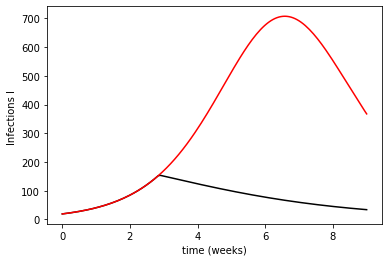

In [10]:
#!/usrbin/python

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd  # To read data
# parameters 
mu0=.1651
a0=3.382
ir0=4.31
k=.02
N0=2000000*k
I0=19
S0=N0-I0
R0=0
M0=0
Y0=45
TC=20.0/7
TCpar=[2.86,15]
TCpar1=['black','red']
# function that returns ds[/dt
def model(z,t):    
    S=z[0]
    I=z[1]
    R=z[2]
    M=z[3]
    Y=z[4]
    N=S+I+R
    ir=ir0
    mu=mu0
    a=a0
    if t>TC:
        ir=3.15
        mu=.1744
        a=3.088
    dSdt=-S*I*ir/(N)
    dIdt=S*I*ir/(N)-(mu +a)*I
    dRdt=a*I
    dMdt= (mu)*I
    dYdt=ir*I*S/N
    return [dSdt,dIdt,dRdt,dMdt,dYdt] 
for kk in range(len(TCpar)):
    # initial condition
    z0=[S0,I0,R0,M0,Y0]
    TC=TCpar[kk]
    # time points
    t = np.linspace(0,9,150)
    # solve ODEs

    z = odeint(model,z0,t)
    S=z[:,0]
    I=z[:,1]
    R=z[:,2]
    M=z[:,3]
    Y=z[:,4]
    N=S+I+R
    s=S/N
    plt.plot(t,I,color=TCpar1[kk],label='I')
# plotting the ensemble graph
plt.xlabel('time (weeks)')
plt.ylabel('Infections I ')
plt.show()


### Removing Social Distancing Restrictions

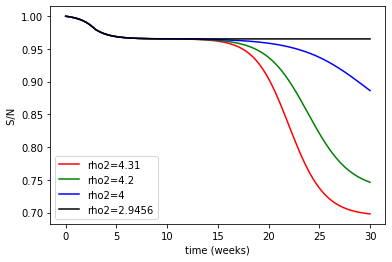

In [12]:
#!/usrbin/python

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd  # To read data
# parameters 
mu=.1651
a=3.382
ir0=4.31
k=.02
N0=2000000*k
I0=19
S0=N0-I0
R0=0
M0=0
Y0=45
TC=20.0/7
Toff=10
iroff=[4.31,4.2,4,2.9456]
iroff1=["red","green",'blue','black']
iroff2=['4.31','4.2','4','2.9456']


# function that returns ds[/dt
def model(z,t):    
    S=z[0]
    I=z[1]
    R=z[2]
    M=z[3]
    Y=z[4]
    N=S+I+R
    ir=ir0
    if t>TC:
        ir=2.9456
    if t> Toff:
        ir=irOFF
    dSdt=-S*I*ir/(N)
    dIdt=S*I*ir/(N)-(mu +a)*I
    dRdt=+a*I
    dMdt= (mu)*I
    dYdt=ir*I
    return [dSdt,dIdt,dRdt,dMdt,dYdt] 

for kk in range(len(iroff)):
        # initial condition
        z0=[S0,I0,R0,M0,Y0]
        irOFF=iroff[kk]

        # time points
        t = np.linspace(0,30,3000)
        # solve ODEs

        z = odeint(model,z0,t)
        S=z[:,0]
        I=z[:,1]
        R=z[:,2]
        M=z[:,3]
        Y=z[:,4]
        N=S+I+R
        s=S/N 
        plt.plot(t,s,color=iroff1[kk],label='rho2='+iroff2[kk])

# plotting the ensemble graph
    
plt.xlabel('time (weeks)')
plt.ylabel(' S/N ')
plt.legend()
plt.show()